In [ ]:
library(dplyr)
library(car)


: Error in `library()`:
! there is no package called ‘effsize’

# Import Dataset

In [8]:
df <- read.csv(
  "stats.survey.csv",
  stringsAsFactors = TRUE,
  strip.white = TRUE,
  na.strings = ""
)

In [ ]:
survey <- read.csv(
  "stats.survey.csv",
  stringsAsFactors = TRUE,
  strip.white = TRUE,
  na.strings = ""
)

# Confirm structure
str(survey)


'data.frame':	237 obs. of  12 variables:
 $ Sex   : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 1 2 1 2 2 ...
 $ WrHnd : num  18.5 19.5 18 18.8 20 18 17.7 17 20 18.5 ...
 $ NWHnd : num  18 20.5 13.3 18.9 20 17.7 17.7 17.3 19.5 18.5 ...
 $ WHnd  : Factor w/ 2 levels "Left","Right": 2 1 2 2 2 2 2 2 2 2 ...
 $ Fold  : Factor w/ 3 levels "L on R","Neither",..: 3 3 1 3 2 1 1 3 3 3 ...
 $ Pulse : int  92 104 87 NA 35 64 83 74 72 90 ...
 $ Clap  : Factor w/ 3 levels "Left","Neither",..: 1 1 2 2 3 3 3 3 3 3 ...
 $ Exer  : Factor w/ 3 levels "Frequent","None",..: 3 2 2 2 3 3 1 1 3 3 ...
 $ Smoke : Factor w/ 4 levels "Heavy","Never",..: 2 4 3 2 2 2 2 2 2 2 ...
 $ Height: num  173 178 NA 160 165 ...
 $ MI    : Factor w/ 2 levels "Imperial","Metric": 2 1 NA 2 2 1 1 2 2 2 ...
 $ Age   : num  18.2 17.6 16.9 20.3 23.7 ...


# 1) Student Ages

## Histogram

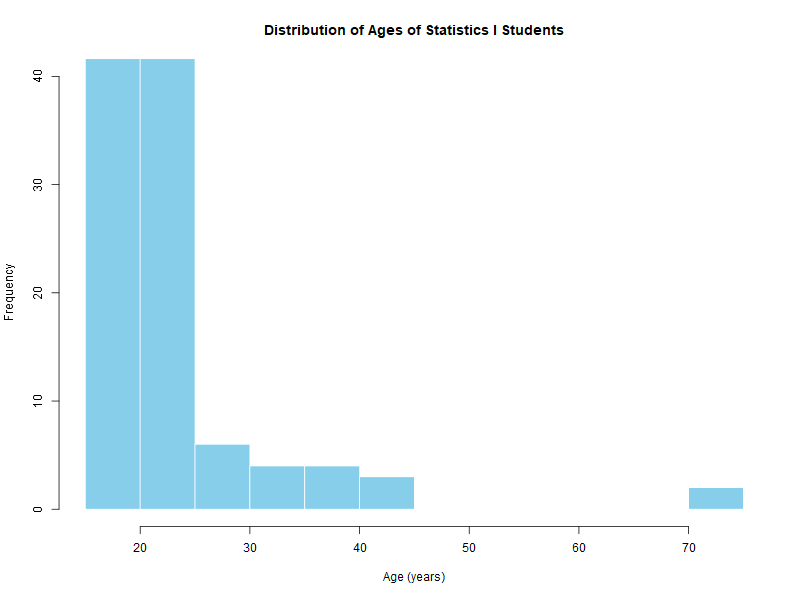

In [10]:
hist(df$Age,
     main = "Distribution of Ages of Statistics I Students",
     xlab = "Age (years)",
     ylab = "Frequency",
     ylim = c(0, 40),  # adjust so all bars fit
     col  = "skyblue",
     border = "white")


## Table

In [ ]:
age_summary <- data.frame(
  Minimum   = min(df$Age, na.rm = TRUE),
  Q1        = quantile(df$Age, 0.25, na.rm = TRUE),
  Median    = median(df$Age, na.rm = TRUE),
  Q3        = quantile(df$Age, 0.75, na.rm = TRUE),
  Maximum   = max(df$Age, na.rm = TRUE),
  Mean      = mean(df$Age, na.rm = TRUE),
  SD        = sd(df$Age,   na.rm = TRUE)
)
print(age_summary)


    Minimum     Q1 Median     Q3 Maximum     Mean       SD
25%   16.75 17.667 18.583 20.167      73 20.37451 6.474335


# 2) Student Heights

## Boxplots

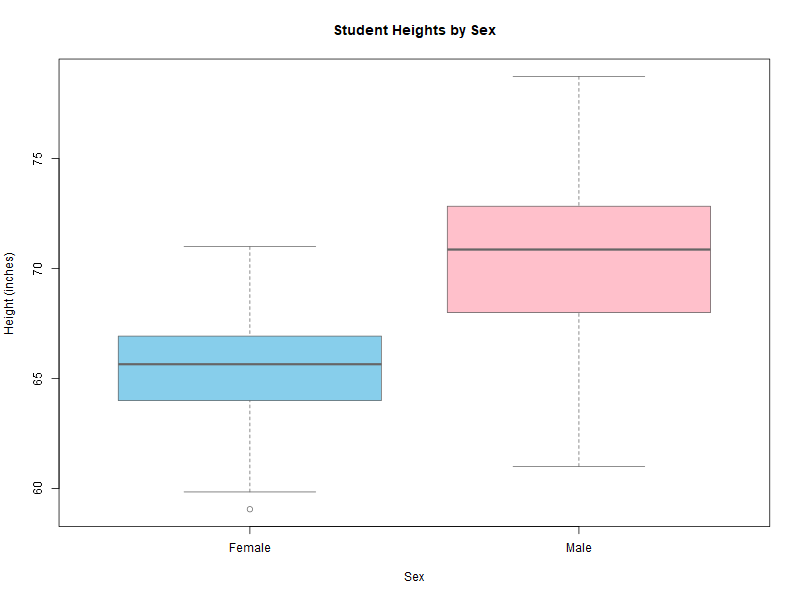

In [19]:
df$Height_Inch <- df$Height / 2.54

boxplot(Height_Inch ~ Sex,
        data  = df,
        main  = "Student Heights by Sex",
        xlab  = "Sex",
        ylab  = "Height (inches)",
        col   = c("skyblue", "pink"),
        border= "gray40")


## Table

In [20]:
height_summary <- df %>%
  group_by(Sex) %>%
  summarise(
    Mean   = mean(Height_Inch, na.rm = TRUE),
    Median = median(Height_Inch, na.rm = TRUE),
    SD     = sd(Height_Inch, na.rm = TRUE),
    .groups = "drop"
)

print(height_summary)

# A tibble: 3 × 4
  Sex     Mean Median    SD
  <fct>  <dbl>  <dbl> <dbl>
1 Female  65.2   65.6  2.42
2 Male    70.4   70.9  3.30
3 <NA>    67.7   67.7 NA   


## Hypothesis Test


	Two Sample t-test

data:  Height_Inch by Sex
t = -12.85, df = 206, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -5.966679 -4.379283
sample estimates:
mean in group Female   mean in group Male 
            65.23097             70.40395 



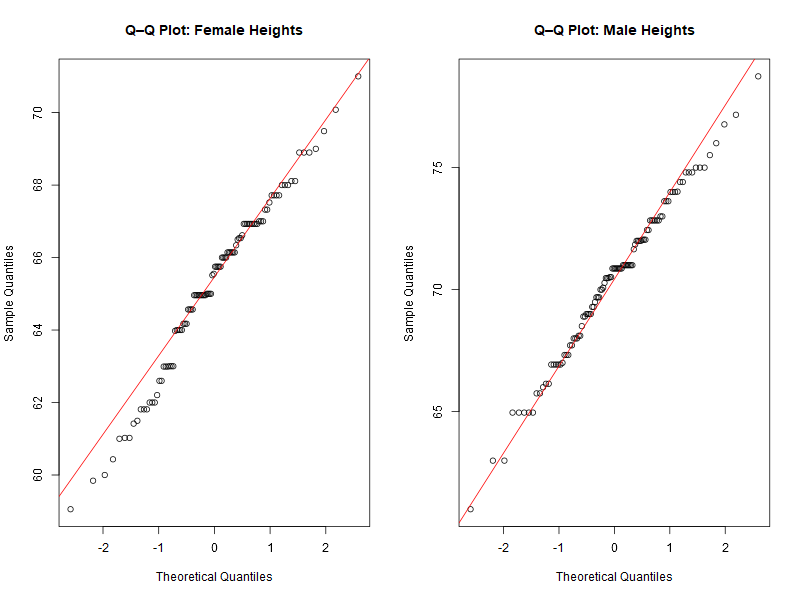

Levene's Test for Homogeneity of Variance (center = median)
       Df F value  Pr(>F)  
group   1  6.5688 0.01109 *
      206                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# Q–Q plots
par(mfrow = c(1, 2))
qqnorm(df$Height_Inch[df$Sex == "Female"],
       main = "Q–Q Plot: Female Heights")
qqline(df$Height_Inch[df$Sex == "Female"], col = "red")

qqnorm(df$Height_Inch[df$Sex == "Male"],
       main = "Q–Q Plot: Male Heights")
qqline(df$Height_Inch[df$Sex == "Male"], col = "red")
par(mfrow = c(1, 1))


l = leveneTest(Height_Inch ~ Sex, data = df)
print(l)



In [30]:

## --- Primary analysis: Welch two-sample t-test ---
t_welch <- t.test(Height_Inch ~ Sex, data = df, var.equal = FALSE, conf.level = 0.95)
print(t_welch)


	Welch Two Sample t-test

data:  Height_Inch by Sex
t = -12.924, df = 192.7, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -5.962418 -4.383543
sample estimates:
mean in group Female   mean in group Male 
            65.23097             70.40395 



# 3) Exercise and Smoking

In [33]:
df$Exer  <- factor(df$Exer,
                   levels = c("None", "Some", "Frequent"))

df$Smoke <- factor(df$Smoke,
                   levels = c("Never", "Occasional", "Regular", "Heavy"))


## Bar Chart

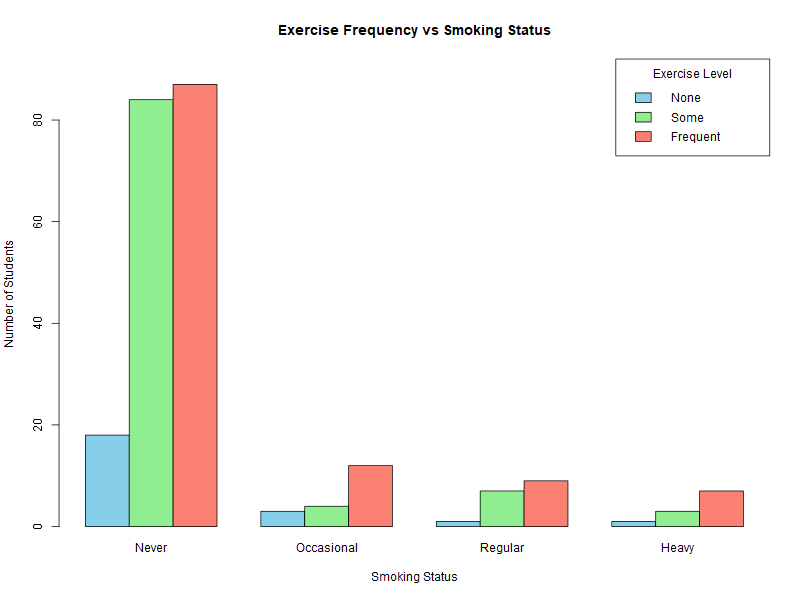

In [ ]:


# Side-by-side bar chart
barplot(exer_smoke_tab,
        beside = TRUE,                     # side-by-side bars
        col    = c("skyblue", "lightgreen", "salmon"), 
        ylim   = c(0, max(exer_smoke_tab) + 5),  # make room for tallest bar
        main   = "Exercise Frequency vs Smoking Status",
        xlab   = "Smoking Status",
        ylab   = "Number of Students",
        legend.text = TRUE,
        args.legend = list(title = "Exercise Level", x = "topright"))


## Table

In [39]:
# Contingency table
exer_smoke_tab <- table(df$Exer, df$Smoke)

# Percentages (overall)
exer_smoke_pct <- prop.table(exer_smoke_tab) * 100

# Combine counts and percentages
combined_table <- matrix(
  paste0(exer_smoke_tab, " (", round(exer_smoke_pct, 1), "%)"),
  nrow = nrow(exer_smoke_tab),
  dimnames = dimnames(exer_smoke_tab)
)

# Row totals (Exer cumulative)
row_totals <- rowSums(exer_smoke_tab)
row_totals_pct <- row_totals / sum(exer_smoke_tab) * 100
row_totals_str <- paste0(row_totals, " (", round(row_totals_pct, 1), "%)")

# Add row totals as a new column
combined_table <- cbind(combined_table, Total = row_totals_str)

# Column totals (Smoke cumulative)
col_totals <- colSums(exer_smoke_tab)
col_totals_pct <- col_totals / sum(exer_smoke_tab) * 100
col_totals_str <- paste0(col_totals, " (", round(col_totals_pct, 1), "%)")

# Add grand total at bottom-right
grand_total <- sum(exer_smoke_tab)
grand_total_str <- paste0(grand_total, " (100%)")

# Combine column totals as a new row
combined_table <- rbind(combined_table, Total = c(col_totals_str, grand_total_str))


# Print combined table
print(combined_table)


         Never         Occasional  Regular     Heavy       Total        
None     "18 (7.6%)"   "3 (1.3%)"  "1 (0.4%)"  "1 (0.4%)"  "23 (9.7%)"  
Some     "84 (35.6%)"  "4 (1.7%)"  "7 (3%)"    "3 (1.3%)"  "98 (41.5%)" 
Frequent "87 (36.9%)"  "12 (5.1%)" "9 (3.8%)"  "7 (3%)"    "115 (48.7%)"
Total    "189 (80.1%)" "19 (8.1%)" "17 (7.2%)" "11 (4.7%)" "236 (100%)" 


# 4) Hand Spans

[1] 0.9483103


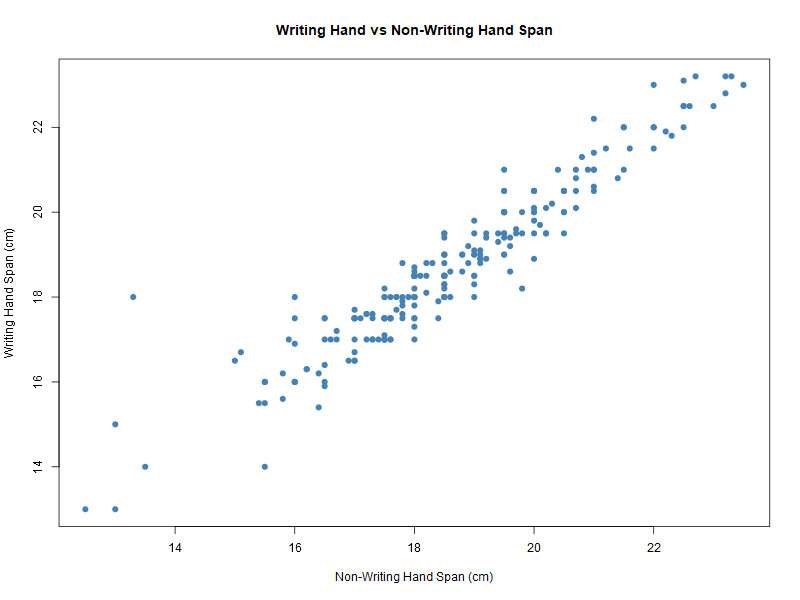

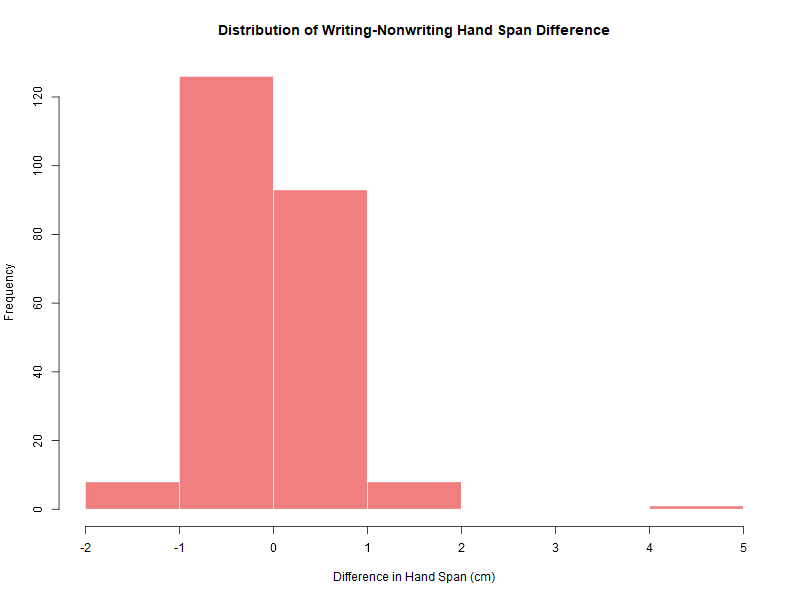

In [40]:
# Create DiffHnd = WrHnd - NWHnd
df$DiffHnd <- df$WrHnd - df$NWHnd

plot(df$NWHnd, df$WrHnd,
     main  = "Writing Hand vs Non-Writing Hand Span",
     xlab  = "Non-Writing Hand Span (cm)",
     ylab  = "Writing Hand Span (cm)",
     pch   = 19,          # solid dots
     col   = "steelblue")

cor_coeff <- cor(df$WrHnd, df$NWHnd, use = "complete.obs")
print(cor_coeff)

hist(df$DiffHnd,
     main = "Distribution of Writing-Nonwriting Hand Span Difference",
     xlab = "Difference in Hand Span (cm)",
     col  = "lightcoral",
     border = "white")



In [41]:
age_summary <- data.frame(
  Minimum   = min(df$DiffHnd, na.rm = TRUE),
  Q1        = quantile(df$DiffHnd, 0.25, na.rm = TRUE),
  Median    = median(df$DiffHnd, na.rm = TRUE),
  Q3        = quantile(df$DiffHnd, 0.75, na.rm = TRUE),
  Maximum   = max(df$DiffHnd, na.rm = TRUE),
  Mean      = mean(df$DiffHnd, na.rm = TRUE),
  SD        = sd(df$DiffHnd,   na.rm = TRUE)
)
print(age_summary)


    Minimum   Q1 Median  Q3 Maximum       Mean       SD
25%    -1.6 -0.3      0 0.5     4.7 0.08644068 0.624386


# End